<a href="https://colab.research.google.com/github/kaburia/ChimpUFE/blob/main/faces_cl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chimpanzee Face Clustering

We know that human faces are unique to each of us but did you know that chimpanzees also have unique faces and different images of the same chimpanzee would naturally cluster together?
This is what we shall be doing with this notebook, using a sample set of 5 chimpanzees with a total of 25 images and see if we can be able to cluster the dataset
- 000000 (5 images)
- 000001 (5 images)
- 000002 (5 images)
- 000003 (5 images)
- 000004 (5 images)

## Overview

1. **Face Embedding Extraction**  
   Facial embeddings are computed from chimpanzee face images using a pre-trained deep learning model. These embeddings encode high-level facial features in a numerical vector space.

   *Iashin, Vladimir, et al. "Self-supervised Learning on Camera Trap Footage Yields a Strong Universal Face Embedder." arXiv preprint arXiv:2507.10552 (2025).*


2. **Clustering**  
   K-Means clustering is applied on the embeddings to group similar faces together. This allows us to identify unique individuals or sets of visually similar faces.

3. **Visualization**  
   Dimensionality reduction techniques (e.g., PCA, t-SNE, or UMAP) are used to project the high-dimensional embeddings into 2D space. The plots clearly show that the faces of chimpanzees cluster, supporting the hypothesis that embeddings can capture individual identity.

## Key Result

The plots in the notebook reveal some distinct clusters corresponding to different chimpanzee individuals.

1. Run all cells to reproduce the results:
   - Extract embeddings  
   - Apply clustering  
   - Visualize clusters  

2. Inspect the generated plots to confirm that chimpanzee faces group into meaningful clusters.

## Applications

- Wildlife monitoring and conservation  
- Automated identification of individual animals  
- Studying social behavior in primates  

---

### PS

One thing to note is though *0.72%* cluster together some of the faces are not we ll clustered and different loss functions could be used to reduce the similarity distances and increase the dissimilarity

<br>
This number was obtained since we have the labels on the images to validate the clusters

In [3]:
!git clone https://github.com/kaburia/ChimpUFE.git
!cd ChimpUFE && pip install -r requirements.txt

Cloning into 'ChimpUFE'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 115 (delta 23), reused 97 (delta 11), pack-reused 0 (from 0)
Receiving objects: 100% (115/115), 29.68 MiB | 40.52 MiB/s, done.
Resolving deltas: 100% (23/23), done.
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu128
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 GB 771.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 94.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 609.6/609.6 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 82.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 726.9/726.9 M

In [4]:
import os
os.chdir('ChimpUFE')

In [5]:
# face recognition weights
!wget -P ./assets/weights https://github.com/v-iashin/ChimpUFE/releases/download/v1.0/25-06-06T20-51-36_330k.pth

--2025-09-16 08:56:56--  https://github.com/v-iashin/ChimpUFE/releases/download/v1.0/25-06-06T20-51-36_330k.pth
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/1015980725/eba327d8-0b11-4110-8215-aedb929c5601?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-09-16T09%3A54%3A08Z&rscd=attachment%3B+filename%3D25-06-06T20-51-36_330k.pth&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-09-16T08%3A53%3A49Z&ske=2025-09-16T09%3A54%3A08Z&sks=b&skv=2018-11-09&sig=pe49%2FUpeA4Hd9izG237wnI6NemP%2FXalYZkVcU0G%2Bx10%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc1ODAxMzMxNiwibmJmIjoxNzU4MDEzMDE2LCJwYXRoIjoicmVsZWFzZ

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import torch
import os

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
from collections import Counter


import notutils as nu
import mlai

In [7]:
# different individuals
!python demo_face_rec.py \
  --pretrained_weights ./assets/weights/25-06-06T20-51-36_330k.pth \
    --gallery_path ./assets/gallery \
    --embeddings embeddings.pt


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:626: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Saved 25 embeddings to embeddings.pt


In [8]:
data = torch.load("/content/ChimpUFE/embeddings.pt")
embeddings, paths = data["embeddings"], data["paths"]


In [9]:
embeddings[0].shape

torch.Size([768])

### K-Means Clustering

In [27]:
# @title Searching for the optimal k value and computing the k means clustering

def cluster_kmeans(X, k=8, random_state=42):
    km = KMeans(n_clusters=k, random_state=random_state)
    labels = km.fit_predict(X)
    centers = km.cluster_centers_  # shape (k, D)
    return labels, centers

def write_plot(counter, caption):
    directory = "./ml"
    filestub = f"kmeans_clustering_{counter:0>3}"
    mlai.write_figure(filestub+".svg", directory=directory)
    f = open(os.path.join(directory,filestub) + '.md', 'w')
    f.write(caption)
    f.close()

def iterative_kmeans_widget(embeddings, paths=None, k_min=2, k_max=10, max_iter=10,
                            fontsize=16, counter_start=0, draw_ellipse=False,
                            add_images=False, image_zoom=0.2):
    """
    Iterative K-means visualization with optional ellipses drawn for clusters
    and optional chimpanzee face images placed on the plot.

    embeddings: np.ndarray [N, D]
    paths: list of str, file paths to chimpanzee face images (must align with embeddings)
    add_images: if True, overlay actual images on 2D scatter plot
    image_zoom: scaling factor for the thumbnails
    """

    # Step 1: Reduce to 2D for visualization
    pca = PCA(n_components=2)
    Y = pca.fit_transform(embeddings)

    # Step 2: Select optimal k using silhouette score
    sil_scores = []
    for k in range(k_min, k_max+1):
        km = KMeans(n_clusters=k, n_init=10, random_state=42).fit(embeddings)
        score = silhouette_score(embeddings, km.labels_)
        sil_scores.append((k, score))
    best_k = max(sil_scores, key=lambda x: x[1])[0]
    print(f"Optimal number of clusters (silhouette): {best_k}")
    final_kmeans = KMeans(n_clusters=best_k, n_init=10, random_state=42).fit(embeddings)
    final_labels = final_kmeans.labels_

    # Step 3: Initialize centres randomly in 2D space
    fig, ax = plt.subplots(figsize=(8, 8))
    centre_inds = np.random.permutation(Y.shape[0])[:best_k]
    centres = Y[centre_inds, :]

    counter = counter_start
    pi_vals = np.linspace(0, 2*np.pi, 200)

    # Initial scatter + centres
    ax.cla()
    ax.plot(Y[:, 0], Y[:, 1], '.', color=[0, 0, 0], markersize=10)
    ax.plot(centres[:, 0], centres[:, 1], 'o', color=[0,0,0], markersize=12, linewidth=3)
    ax.set_xlabel("PC1", fontsize=fontsize)
    ax.set_ylabel("PC2", fontsize=fontsize)
    ax.set_title("Initial cluster centres")

    # Overlay images if requested
    if add_images and paths is not None:
        for (x0, y0), img_path in zip(Y, paths):
            try:
                img = mpimg.imread(img_path)
                imagebox = OffsetImage(img, zoom=image_zoom)
                ab = AnnotationBbox(imagebox, (x0, y0), frameon=False)
                ax.add_artist(ab)
            except Exception as e:
                print(f"Could not load image {img_path}: {e}")

    write_plot(counter, f"Initialize {best_k} cluster centres.")
    counter += 1

    # Step 4: Iterate K-means updates
    for i in range(max_iter):
        # Assign points
        dist_mat = ((Y[:, :, None] - centres.T[None, :, :])**2).sum(1)
        ind = dist_mat.argmin(1)

        ax.cla()
        colors = ["green", "blue", "purple", "orange", "cyan", "magenta"]
        markers = ["x", "o", "+", "s", "d", "^", "v"]

        for j in range(best_k):
            cluster_points = Y[ind==j, :]

            # If not adding images, plot markers
            if not add_images:
                ax.plot(cluster_points[:, 0], cluster_points[:, 1],
                        markers[j % len(markers)], color=colors[j % len(colors)],
                        markersize=8, alpha=0.7)

            # If adding images, overlay thumbnails for each point
            if add_images and paths is not None:
                for (x0, y0), img_path in zip(cluster_points, np.array(paths)[ind==j]):
                    try:
                        img = mpimg.imread(img_path)
                        imagebox = OffsetImage(img, zoom=image_zoom)
                        ab = AnnotationBbox(imagebox, (x0, y0), frameon=False)
                        ax.add_artist(ab)
                    except Exception as e:
                        print(f"Could not load image {img_path}: {e}")

            if draw_ellipse and cluster_points.shape[0] > 2:
                # Compute covariance ellipse
                cov = np.cov(cluster_points, rowvar=False)
                vals, vecs = np.linalg.eigh(cov)
                order = vals.argsort()[::-1]
                vals, vecs = vals[order], vecs[:, order]
                L = np.dot(vecs, np.diag(np.sqrt(vals)))
                ellipse = np.dot(np.column_stack([np.cos(pi_vals), np.sin(pi_vals)]), L.T)
                ax.plot(centres[j, 0] + ellipse[:, 0], centres[j, 1] + ellipse[:, 1],
                        linewidth=2, color="black")

        # Plot centres
        ax.plot(centres[:, 0], centres[:, 1], 'o', color=[0,0,0], markersize=12, linewidth=3)
        ax.set_xlabel("PC1", fontsize=fontsize)
        ax.set_ylabel("PC2", fontsize=fontsize)
        ax.set_title(f"K-means Iteration {i+1}")

        write_plot(counter, f"Assign points to clusters (iteration {i+1}).")
        counter += 1

        # Update centres
        for j in range(best_k):
            if np.any(ind == j):
                centres[j, :] = np.mean(Y[ind==j, :], axis=0)
        write_plot(counter, f"Update cluster centres (iteration {i+1}).")
        counter += 1

    return counter, best_k, final_labels


Optimal number of clusters (silhouette): 6


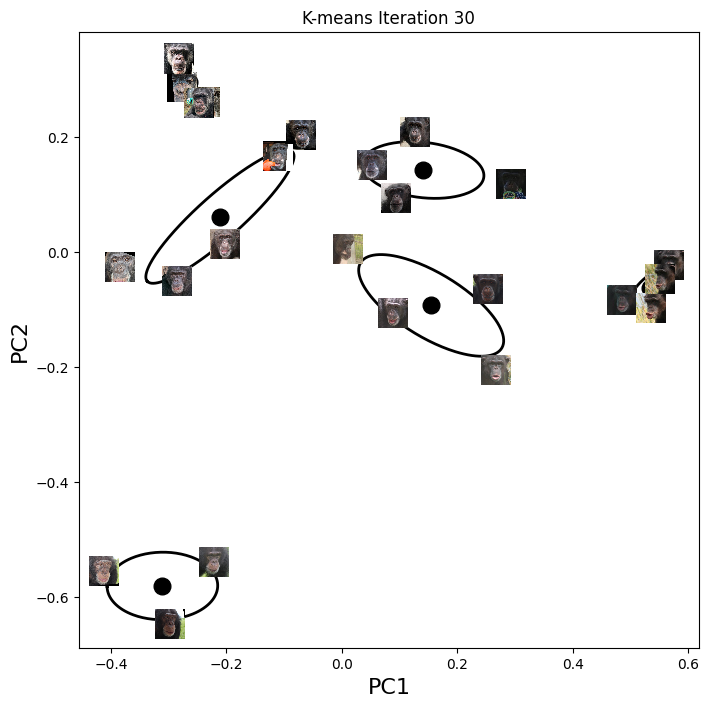

In [20]:
max_iteration = 30
counter, best_k, final_labels = iterative_kmeans_widget(embeddings,
                        paths=paths, add_images=True,
                        draw_ellipse=True,
                        max_iter=max_iteration,
                        image_zoom=0.095)

In [21]:
nu.display_plots("kmeans_clustering_{counter:0>3}.svg", directory="./ml",
                            text_top='kmeans_clustering_{counter:0>3}.tex', counter=(0, max_iteration+1))

interactive(children=(Text(value='kmeans_clustering_{counter:0>3}.tex', description='text_top'), IntSlider(val…

In [ ]:
# @title Looking at the labels
def interactive_visualize_embeddings(embeddings, paths, method="pca", num_samples=25):
    """
    Visualize embeddings interactively in 2D using PCA or t-SNE with Plotly.
    embeddings: torch.Tensor [N, D]
    paths: list of file paths (len N)
    method: "pca" or "tsne"
    num_samples: max number of points to plot for clarity
    """
    embeddings_np = embeddings.cpu().numpy()
    original_indices = np.arange(len(embeddings_np))

    if len(embeddings_np) > num_samples:
        idx = np.random.choice(len(embeddings_np), num_samples, replace=False)
        embeddings_np = embeddings_np[idx]
        paths = [paths[i] for i in idx]
        original_indices = original_indices[idx]

    if method == "pca":
        reducer = PCA(n_components=2)
        reduced = reducer.fit_transform(embeddings_np)
    else:
        perplexity_value = min(30, embeddings_np.shape[0] - 1)
        reducer = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
        reduced = reducer.fit_transform(embeddings_np)

    labels = [os.path.basename(os.path.dirname(path)) for path in paths]

    df = pd.DataFrame(reduced, columns=['Dim 1', 'Dim 2'])
    df['path'] = paths
    df['Chimpanzee ID'] = labels

    fig = px.scatter(df, x='Dim 1', y='Dim 2', color='Chimpanzee ID',
                     hover_data={'path': True, 'Dim 1': False, 'Dim 2': False},
                     title=f"Interactive Embedding visualization ({method.upper()})")
    fig.show()

interactive_visualize_embeddings(embeddings, paths, method="pca")

In [24]:
def validate_clusters_by_paths(paths, cluster_labels):
    """
    Validate clustering results against ground-truth IDs
    encoded in the parent folder names of the file paths.

    Args:
        paths: list of str, file paths (e.g. ".../000000/01.png")
        cluster_labels: np.ndarray of shape [N,], cluster assignments from KMeans

    Returns:
        bad_mask: boolean array of shape [N,], True if misclustered
        accuracy: float, overall clustering accuracy
    """
    # Extract true labels from parent folder name
    true_labels = [os.path.basename(os.path.dirname(p)) for p in paths]
    true_labels = np.array(true_labels)

    # Map each ground-truth ID to its dominant cluster
    bad_mask = np.zeros(len(paths), dtype=bool)
    gt_to_cluster = {}

    for gt in np.unique(true_labels):
        idx = np.where(true_labels == gt)[0]
        assigned_clusters = cluster_labels[idx]
        if len(assigned_clusters) == 0:
            continue
        # majority cluster for this gt class
        dominant_cluster = Counter(assigned_clusters).most_common(1)[0][0]
        gt_to_cluster[gt] = dominant_cluster

        # mark misclustered points
        bad_mask[idx] = assigned_clusters != dominant_cluster

    # Compute accuracy
    accuracy = 1.0 - bad_mask.mean()

    return bad_mask, accuracy

bad_mask, accuracy = validate_clusters_by_paths(paths, final_labels)
print(f"Accuracy: {accuracy:.3f}")


Accuracy: 0.720


## Dataset with other faces of chimpanzees
#### !git clone https://github.com/cvjena/chimpanzee_faces.git

In [26]:
!git clone https://github.com/cvjena/chimpanzee_faces.git

Cloning into 'chimpanzee_faces'...
remote: Enumerating objects: 7252, done.
remote: Total 7252 (delta 0), reused 0 (delta 0), pack-reused 7252 (from 1)
Receiving objects: 100% (7252/7252), 602.71 MiB | 30.34 MiB/s, done.
Resolving deltas: 100% (23/23), done.
Updating files: 100% (7210/7210), done.


In [32]:
# running through the additional dataset
!python demo_face_rec.py \
  --pretrained_weights ./assets/weights/25-06-06T20-51-36_330k.pth \
    --gallery_path ./chimpanzee_faces/datasets_cropped_chimpanzee_faces/data_CTai \
    --embeddings new_dataset_embeddings.pt

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:626: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x12a0b71adf80>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1663, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1627, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.12/multiprocessing/process.py", line 149, in join
    res = self._popen.wait(timeout)
          ^^

In [ ]:
# load the embeddings
